# Busines Problem

Understanding the needs of the customers is a very important for those who want to start a business. Although the needs are important, the most important aspect to have in mind is to consider the socioeconomic backgrounds of the possible target group. For example, although people might need accomodation, they might not be able to buy one as their economic resources might not be enough. Thus, what is important it to direct what kind of socioeconomic status they have. 

The business idea of this project is to understand the buying behaviours of different neighboorhoods in Munich and based on that suggest stakeholders to start business that can address to those people living in such neighborhoods budgets. As know in Germany, people who have middle and lower socioeconomic backgrounds generally shop from such supermarkets as Aldi or Lidl. Besides, it is mostly known that those people eat at McDonalds. Therefore, it will be more appropriate to build shops adressing to poor or middle class neighborhoods and Rewe or Tengelman to high class neighborhoods. 


# How to Use the Location Data

Munich location data and its neighboohds data will be reached using Foursquare API and the neighborhoods will be clustered together based on their socioeconomic status (as there are certain neighborhoods where mostly rich and others where mostly poor people live). Based on the clustered neighborhoods, the number of Aldi, Lidl, Tengelman and Rewe in each cluster will be calculated. Further, their spatial proximities will also be added in when suggestion a stakeholder to build a certain shop at a certain neighborhood. 


In [2]:
#### getting the boroughs in Munich
import requests
import re
from bs4 import BeautifulSoup as BS
import numpy as np
import pandas as pd
import geopy
import matplotlib 
import folium
from geopy.geocoders import Nominatim

In [3]:
#### Getting the area of each Borough
source_ar = requests.get('http://www.total-munich.com/20160623888/blog/moving-to-munich/moving-to-munich-introduction-to-munich-s-boroughs.html').text
soup_ar = BS(source_ar, 'lxml')

In [4]:
area = []
bou = []


for c in soup_ar.find_all('td', {'style':'width: 44.5pt; padding: 0.75pt;'}):
    ar = c.text
    area.append(ar)
    print(ar)

for pl in soup_ar.find_all('span', {'style':'color: blue; font-size: 10pt;'}): 
    place = pl.text
    bou.append(place)
    print(place)

Surface (km²)

3.15

4.40

4.30

4.36

4.22

3.94

7.81

2.07

12.91

11.09

13.42

25.67

23.71

6.31

22.45

19.90

5.72

8.06

17.76

9.22

16.50

34.06

15.45

28.94

5.29



310.71

Altstadt-Lehel
Maxvorstadt
Schwabing-West
Au-Haidhausen
Sendling
Sendling-Westpark
Schwanthalerhöhe
Neuhausen-Nymphenburg
Moosach
Milbertshofen-Am Hart
Schwabing-Freimann
Bogenhausen
Berg am Laim
Trudering-Riem
Ramersdorf-Perlach
Obergiesing-Fasangarten
Untergiesing-Harlaching
Thalkirchen-Obersendling- Forstenried-Fürstenried-Solln
Hadern
Pasing-Obermenzing
Aubing-Lochhausen-Langwied
Allach-Untermenzing
Feldmoching-Hasenbergl
Laim


In [5]:
population = [20.806, 52.177, 52.575, 67.094, 60.756, 40.422, 56.485, 30.083, 97.521, 52.657, 74.667, 71.802, 83.900, 44.002,
       68.063, 110.099, 52.743, 52.452, 91.412, 49.874, 71.880, 42.859, 31.353, 60.262, 54.714]
 

In [6]:
bou = ['Altstadt-Lehel','Ludwigsvorstadt-Isarvorstadt', 'Maxvorstadt ','Schwabing-West','Au-Haidhausen','Sendling','Sendling-Westpark',
 'Schwanthalerhöhe','Neuhausen-Nymphenburg','Moosach','Milbertshofen-Am Hart','Schwabing-Freimann','Bogenhausen','Berg am Laim',
 'Trudering-Riem','Ramersdorf-Perlach','Obergiesing-Fasangarten','Untergiesing-Harlaching','Thalkirchen-Obersendling- Forstenried-Fürstenried-Solln',
 'Hadern','Pasing-Obermenzing','Aubing-Lochhausen-Langwied','Allach-Untermenzing','Feldmoching-Hasenbergl','Laim']

In [7]:
soceclev = ['Very High', 'High', 'High', 'Medium', 'Medium', 'Very High', 'Medium', 'Very High', 'Low', 'High', 'Medium', 
           'Medium', 'Low', 'High', 'Medium', 'Low', 'High', 'High', 'Low', 'High', 'Medium', 'High', 'Very High', 'Medium', 'Medium']

#### source: http://mstatistik-muenchen.de/regionalersozialatlas/2017/atlas.html?detectflash=false

In [8]:
surface = [3.15, 4.40, 4.30, 4.36, 4.22, 3.94, 7.81, 2.07, 12.91, 11.09, 13.42, 25.67, 23.71, 6.31, 22.45, 19.90, 5.72, 8.06, 17.76, 9.22, 16.50, 34.06, 15.45, 28.94, 5.29]

In [9]:
area_data = pd.DataFrame()
area_data['Borough'] = bou
area_data['Population'] = population
area_data['Social-Class'] = soceclev
area_data['Surface (km²)'] = surface
area_data.head(3)


,Borough,Population,Social-Class,Surface (km²)
0,Altstadt-Lehel,20.806,Very High,3.15
1,Ludwigsvorstadt-Isarvorstadt,52.177,High,4.40
2,Maxvorstadt,52.575,High,4.30


In [10]:
### getting latitudes and longitudes of each borough
lattitudes = []
longitudes = []

for bor in bou:
    address = bor
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    lattitudes.append(latitude)
    longitudes.append(longitude)

C:\Users\CAFER BAKAC\Anaconda3\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [11]:
area_data['Latitude'] = lattitudes
area_data['Longitude'] = longitudes
area_data.head(5)

,Borough,Population,Social-Class,Surface (km²),Latitude,Longitude
0,Altstadt-Lehel,20.806,Very High,3.15,48.138712,11.588795
1,Ludwigsvorstadt-Isarvorstadt,52.177,High,4.40,48.131771,11.555809
2,Maxvorstadt,52.575,High,4.30,48.146570,11.571445
3,Schwabing-West,67.094,Medium,4.36,48.164417,11.570364
4,Au-Haidhausen,60.756,Medium,4.22,48.128753,11.590536


## Running some descriptive statistics to discover the dataset

In [12]:
len(area_data['Borough'])

25

In [46]:
## lets see which one has the largest population
max(area_data['Population'])

110.099

In [14]:
df2 = area_data.set_index("Population", drop = False)

In [15]:
### lets see if it is true
df2.loc[110.099, : ]

Borough          Ramersdorf-Perlach
Population                  110.099
Social-Class                    Low
Surface (km²)                  19.9
Latitude                    48.1153
Longitude                   11.6144
Name: 110.099, dtype: object

In [32]:
## Lets see if there is a correlation between population and the area size 
import matplotlib
import scipy

In [33]:
import seaborn 

TypeError: 'NoneType' object is not iterable

In [24]:
df2.corr() ### even though it doesnt make sense to see the correlation between all of the variables as Ltitudes and longitudes...


,Population,Surface (km²),Latitude,Longitude
Population,1.000000,0.403581,-0.004205,0.102977
Surface (km²),0.403581,1.000000,0.358006,-0.112889
Latitude,-0.004205,0.358006,1.000000,-0.490632
Longitude,0.102977,-0.112889,-0.490632,1.000000


In [25]:
df2[['Population', 'Surface (km²)']].corr()

,Population,Surface (km²)
Population,1.000000,0.403581
Surface (km²),0.403581,1.000000


In [28]:
pearson_coef, p_value = scipy.stats.pearsonr(area_data['Population'], area_data['Surface (km²)'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.40358083595911676  with a P-value of P = 0.04543388769037559


In [29]:
#### lets plot it!
sns.regplot(x="Surface (km²)", y="Population", data=df2)  #### seems like there is no such a big correlation
plt.ylim(0,)

NameError: name 'sns' is not defined

In [68]:
grouped_test=area_data[['Social-Class','Population']].groupby(['Social-Class'])
grouped_test.head(2)

,Social-Class,Population
0,Very High,20.806
1,High,52.177
2,High,52.575
3,Medium,67.094
4,Medium,60.756
5,Very High,40.422
8,Low,97.521
12,Low,83.900


In [71]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('Very High')['Population'], grouped_test.get_group('High')['Population'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 31.665562394473053 , P = 0.00021925568735929046


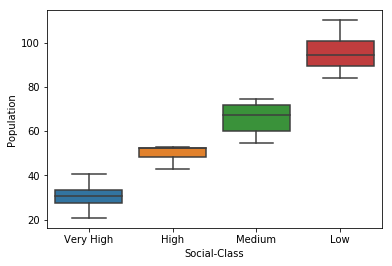

In [62]:
#### Lets See if there are population differences among boroughs of different classes 
sns.boxplot(x='Social-Class', y = 'Population', data = area_data)

In [73]:
#### Creating a MAP of Munich With neighborhoods
address = 'Munich'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Munich are {}, {}.'.format(latitude, longitude))

C:\Users\CAFER BAKAC\Anaconda3\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Munich are 48.1371079, 11.5753822.


In [80]:
# create map of New York using latitude and longitude values
map_munich = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
#for lat, lng, borough in zip(area_data['Latitude'], area_data['Longitude'], area_data['Borough']):
    #label = '{}'.format(borough)
    #label = folium.Popup(label, parse_html=True)
    #folium.CircleMarker(
        #[lat, lng],
        #radius=5,
        #popup=label,
        #color='blue',
        #fill=True,
        #fill_color='Blue',
        #fill_opacity=0.5,
        #parse_html=False).add_to(map_munich)  
    
map_munich

In [81]:
#### working with foursquare
CLIENT_ID = 'AKOUQBSZCJN1EQOF1FH511ZM45JP5NWTGO5SYZ2FLVJU2UZO' # your Foursquare ID
CLIENT_SECRET = 'NUSOCJ2MBLVPMDTOF1J5DUWQ1LU1ZXV0GYJRXEOVHQPCELSK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AKOUQBSZCJN1EQOF1FH511ZM45JP5NWTGO5SYZ2FLVJU2UZO
CLIENT_SECRET:NUSOCJ2MBLVPMDTOF1J5DUWQ1LU1ZXV0GYJRXEOVHQPCELSK


In [82]:
### lets get the area around eden wollf hotel in Munich
address = 'Arnulfstrasse 4, 80335 Munich'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

C:\Users\CAFER BAKAC\Anaconda3\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


48.1429529 11.5536967340932


In [83]:
### search for a Lidl
search_query = 'Lidl'
radius = 500
print(search_query + ' .... OK!')

Lidl .... OK!


In [84]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=AKOUQBSZCJN1EQOF1FH511ZM45JP5NWTGO5SYZ2FLVJU2UZO&client_secret=NUSOCJ2MBLVPMDTOF1J5DUWQ1LU1ZXV0GYJRXEOVHQPCELSK&ll=48.1429529,11.5536967340932&v=20180604&query=Lidl&radius=500&limit=30'

In [87]:
from pandas.io.json import json_normalize

In [100]:
area_data.loc[0, 'Borough']

'Altstadt-Lehel'

In [102]:
neighborhood_latitude = area_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = area_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = area_data.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Altstadt-Lehel are 48.1387124, 11.5887948.


In [103]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [104]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5bf2f9309fb6b75e31b6d1f7'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4cb174a0ef1b370463bc4300-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_',
          'suffix': '.png'},
         'id': '5744ccdfe4b0c0459246b4e2',
         'name': 'Pastry Shop',
         'pluralName': 'Pastry Shops',
         'primary': True,
         'shortName': 'Pastry'}],
       'id': '4cb174a0ef1b370463bc4300',
       'location': {'address': 'St. Anna Str. 11',
        'cc': 'DE',
        'city': 'München',
        'country': 'Deutschland',
        'distance': 157,
        'formattedAddress': ['St. Anna Str. 11',
         '80538 München',
         'Deutschland'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.1393750838

In [105]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [106]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Patisserie Café Dukatz,Pastry Shop,48.139375,11.586923
1,La Stanza,Italian Restaurant,48.139830,11.586984
2,GOP Varieté-Theater,Performing Arts Venue,48.138204,11.588023
3,Maxmonument,Outdoor Sculpture,48.137530,11.588065
4,Liebighof im Lehel,German Restaurant,48.140738,11.590670


In [107]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

40 venues were returned by Foursquare.


In [108]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [109]:
###  get the munich venues
munich_venues = getNearbyVenues(names=area_data['Borough'],
                                   latitudes=area_data['Latitude'],
                                   longitudes=area_data['Longitude']
                                  )

Altstadt-Lehel
Ludwigsvorstadt-Isarvorstadt
Maxvorstadt 
Schwabing-West
Au-Haidhausen
Sendling
Sendling-Westpark
Schwanthalerhöhe
Neuhausen-Nymphenburg
Moosach
Milbertshofen-Am Hart
Schwabing-Freimann
Bogenhausen
Berg am Laim
Trudering-Riem
Ramersdorf-Perlach
Obergiesing-Fasangarten
Untergiesing-Harlaching
Thalkirchen-Obersendling- Forstenried-Fürstenried-Solln
Hadern
Pasing-Obermenzing
Aubing-Lochhausen-Langwied
Allach-Untermenzing
Feldmoching-Hasenbergl
Laim


In [113]:
munich_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allach-Untermenzing,6,6,6,6,6,6
Altstadt-Lehel,40,40,40,40,40,40
Au-Haidhausen,46,46,46,46,46,46
Aubing-Lochhausen-Langwied,11,11,11,11,11,11
Berg am Laim,9,9,9,9,9,9
Bogenhausen,8,8,8,8,8,8
Feldmoching-Hasenbergl,7,7,7,7,7,7
Hadern,15,15,15,15,15,15
Laim,22,22,22,22,22,22


In [115]:
print('There are {} uniques categories.'.format(len(munich_venues['Venue Category'].unique())))

There are 141 uniques categories.


In [116]:
# one hot encoding
munich_onehot = pd.get_dummies(munich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
munich_onehot['Neighborhood'] = munich_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [munich_onehot.columns[-1]] + list(munich_onehot.columns[:-1])
munich_onehot = munich_onehot[fixed_columns]

munich_onehot.head()

,Neighborhood,Afghan Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Baby Store,Bagel Shop,Bakery,...,Tram Station,Trattoria/Osteria,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Xinjiang Restaurant
0,Altstadt-Lehel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Altstadt-Lehel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Altstadt-Lehel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Altstadt-Lehel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Altstadt-Lehel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
munich_grouped = munich_onehot.groupby('Neighborhood').mean().reset_index()
munich_grouped

,Neighborhood,Afghan Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Baby Store,Bagel Shop,Bakery,...,Tram Station,Trattoria/Osteria,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Xinjiang Restaurant
0,Allach-Untermenzing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
1,Altstadt-Lehel,0.000000,0.050000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.025000,0.000000,0.000000,0.000000,0.025000,0.000,0.000000,0.000000,0.000000
2,Au-Haidhausen,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.021739,0.000000,0.021739,0.021739,0.000000,0.000,0.000000,0.000000,0.000000
3,Aubing-Lochhausen-Langwied,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
4,Berg am Laim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
5,Bogenhausen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000
6,Feldmoching-Hasenbergl,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
7,Hadern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
8,Laim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.045455,0.045455,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.045455,0.000000
9,Ludwigsvorstadt-Isarvorstadt,0.000000,0.020833,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,0.020833,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.020833,0.020833,0.020833


In [118]:
num_top_venues = 5

for hood in munich_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = munich_grouped[munich_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allach-Untermenzing----
                venue  freq
0   German Restaurant  0.33
1   Trattoria/Osteria  0.17
2           Gift Shop  0.17
3  Italian Restaurant  0.17
4              Bakery  0.17


----Altstadt-Lehel----
                venue  freq
0   German Restaurant  0.10
1  Italian Restaurant  0.08
2                 Bar  0.05
3        Cocktail Bar  0.05
4         Art Gallery  0.05


----Au-Haidhausen----
                venue  freq
0  Italian Restaurant  0.15
1                Café  0.07
2   German Restaurant  0.04
3   French Restaurant  0.04
4     Thai Restaurant  0.04


----Aubing-Lochhausen-Langwied----
                venue  freq
0              Bakery  0.18
1    Greek Restaurant  0.09
2               Hotel  0.09
3  Light Rail Station  0.09
4         Post Office  0.09


----Berg am Laim----
         venue  freq
0  Supermarket  0.22
1    Drugstore  0.11
2       Bakery  0.11
3         Café  0.11
4        Hotel  0.11


----Bogenhausen----
                venue  freq
0  Italian Rest

In [119]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [120]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = munich_grouped['Neighborhood']

for ind in np.arange(munich_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(munich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,German Restaurant,Bakery,Italian Restaurant,Trattoria/Osteria,Gift Shop,Electronics Store,Ethiopian Restaurant,Event Space,Dumpling Restaurant,Falafel Restaurant
1,Altstadt-Lehel,German Restaurant,Italian Restaurant,Plaza,Art Gallery,Cocktail Bar,Museum,Beach,Bar,Restaurant,Café
2,Au-Haidhausen,Italian Restaurant,Café,Coffee Shop,German Restaurant,French Restaurant,Concert Hall,Thai Restaurant,Afghan Restaurant,Doner Restaurant,Restaurant
3,Aubing-Lochhausen-Langwied,Bakery,Post Office,Hotel,German Restaurant,Soccer Field,Greek Restaurant,Gym / Fitness Center,Supermarket,Light Rail Station,Photography Studio
4,Berg am Laim,Supermarket,Hotel,Café,Fast Food Restaurant,Gastropub,Drugstore,Construction & Landscaping,Bakery,Event Space,Falafel Restaurant
5,Bogenhausen,Italian Restaurant,Water Park,Greek Restaurant,Bus Stop,Tram Station,Park,Bank,Xinjiang Restaurant,Farmers Market,Food Court
6,Feldmoching-Hasenbergl,Bus Stop,Greek Restaurant,Taverna,Café,Bakery,German Restaurant,Xinjiang Restaurant,Food & Drink Shop,Fried Chicken Joint,French Restaurant
7,Hadern,Bakery,Bus Stop,Sushi Restaurant,Pharmacy,Supermarket,Food & Drink Shop,Ice Cream Shop,Hotel,Bus Line,Trattoria/Osteria
8,Laim,Supermarket,Doner Restaurant,Coffee Shop,Tanning Salon,Fried Chicken Joint,Sporting Goods Shop,Restaurant,Sandwich Place,Bus Line,Greek Restaurant
9,Ludwigsvorstadt-Isarvorstadt,Hotel,Italian Restaurant,Café,German Restaurant,Plaza,Pharmacy,Sandwich Place,Burrito Place,Snack Place,Chinese Restaurant


In [125]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 4

munich_grouped_clustering = munich_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(munich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [128]:
munich_merged = area_data

# add clustering labels
munich_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
munich_merged = munich_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Borough')

munich_merged.head() # check the last columns!

,Borough,Population,Social-Class,Surface (km²),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altstadt-Lehel,20.806,Very High,3.15,48.138712,11.588795,2,German Restaurant,Italian Restaurant,Plaza,Art Gallery,Cocktail Bar,Museum,Beach,Bar,Restaurant,Café
1,Ludwigsvorstadt-Isarvorstadt,52.177,High,4.40,48.131771,11.555809,0,Hotel,Italian Restaurant,Café,German Restaurant,Plaza,Pharmacy,Sandwich Place,Burrito Place,Snack Place,Chinese Restaurant
2,Maxvorstadt,52.575,High,4.30,48.146570,11.571445,0,Café,History Museum,Bar,Art Museum,Plaza,Nightclub,Indian Restaurant,Vietnamese Restaurant,Italian Restaurant,Modern European Restaurant
3,Schwabing-West,67.094,Medium,4.36,48.164417,11.570364,0,Vietnamese Restaurant,Supermarket,Bar,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Mexican Restaurant,Café,Italian Restaurant,Indian Restaurant
4,Au-Haidhausen,60.756,Medium,4.22,48.128753,11.590536,0,Italian Restaurant,Café,Coffee Shop,German Restaurant,French Restaurant,Concert Hall,Thai Restaurant,Afghan Restaurant,Doner Restaurant,Restaurant


In [130]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [132]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(munich_merged['Latitude'], munich_merged['Longitude'], munich_merged['Borough'], munich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters